# Analítica de datos
# Examen parcial 1
# 2020-01
# <font color='red'> Alejandro Narvaez, A00130548 </font>

El dataset que deben analizar contiene los registros del histórico de las personas a las que se les ha otorgado un crédito financiero, indicando quienes pudieron pagarlo sin problemas y quienes no.

La idea es poder predecir, utilizando modelos de aprendizaje supervisado (KNN y Naïve Bayes) y las variables independientes disponibles qué aspirantes a un crédito tienen mas o menos riesgo de pagar.

Las variables de la hoja de datos son las siguientes:
- ID: El ID único del cliente en el banco. Variable numérica positiva. 
- PudoPagar: Indica si el cliente ha podido pagar el crédito sin problemas (1) o no (0). Variable categórica binaria.
- Estudiante: Indica si el cliente es estudiante (Si) o no lo es (No). Variable categórica binaria.
- Deuda: Indica la cantidad de dinero que aún adeuda el cliente correspondiente a préstamos. Valores numéricos positivos o en cero.
- Cuenta: Indica el dinero que tiene en la cuenta del banco. Valores numéricos. Estas cuentas no permiten tener saldo en rojo.

## Entendimiento de los datos, limpieza

El archivo "creditos_examen.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

#### Puntos a desarrollar

- <font color='red'>1. Limpieza de datos: Exploren los datos e identifiquen problemas e inconsistencias del dataset teniendo en cuenta el diccionario de datos y del contexto. Arreglen los problemas identificados (solo después de identificarlos todos), argumentando sus decisiones. (2.0)</font>
- <font color='red'>2. Obtengan el modelo de referencia (Baseline), interprételo y calcule su accuracy. (0.3)</font>

## Modelamiento con K-NN y Naïve Bayes

#### Puntos a desarrollar:

<font color='red'>Entrene modelos de clasificación siguiendo el siguiente protocolo:</font>
- <font color='red'>3. Haga un holdout estratificado 70% training - 30% test sobre el dataset solo incluyendo las variables numéricas. No olvide normalizar los datos correctamente (0.3)</font>
- <font color='red'>4. Sobre el training set siga un protocolo de 5 fold cross validation para buscar los mejores valores de los parámetros de un modelo K-NN, teniendo en cuenta el Kappa. Evaluar un modelo global, otro para estudiantes y otro para no estudiantes. Concluir (0.9)</font>
- <font color='red'>5. Sobre el training set siga un protocolo de 5 fold cross validation para buscar los mejores valores de los parámetros de un modelo NaïveBayes, tenga en cuenta utilizar las distribuciones adecuadas a los tipos de variables predictivas. Repetir el proceso de los tres modelos. (0.9) Si quisieramos incluir el efecto de la variable Estudiante en el modelo entrenado con las variables numéricas sin utilizar sklearn, que tenemos que hacer (0.2)</font>
- <font color='red'>6. Sobre el test set compare los dos modelos (K-NN y NB) y escoja el mejor según el Kappa (0.4)</font>

# Desarrollo de los puntos

In [147]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import naive_bayes, neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [148]:
df = pd.read_csv('creditos_examen.csv', sep=';')
df

,ID,PudoPagar,Estudiante,Deuda,Cuenta
0,1,0,No,4436163,3647632
1,2,0,Si,1210613,4085902
2,3,0,No,3176714,5367746
3,4,0,No,3570449,2646253
4,5,0,No,3846350,3928279
5,6,0,Si,749156,4597943
6,7,0,No,2490523,4127567
7,8,0,Si,1760045,4043338
8,9,0,No,3746853,5805289
9,10,0,No,2927527,0


In [149]:
df.describe(include="all")

,ID,PudoPagar,Estudiante,Deuda,Cuenta
count,10002.000000,10002.000000,9998,1.000200e+04,1.000200e+04
unique,NaN,NaN,4,NaN,NaN
top,NaN,NaN,No,NaN,NaN
freq,NaN,NaN,7050,NaN,NaN
mean,5000.379324,0.033293,NaN,3.036624e+06,1.545269e+07
std,2887.127481,0.179410,NaN,7.028235e+07,1.019546e+09
min,-3.000000,0.000000,NaN,-4.288864e+09,-2.247063e+07
25%,2500.250000,0.000000,NaN,1.823657e+06,2.408188e+06
50%,5000.500000,0.000000,NaN,3.209805e+06,4.118185e+06
75%,7500.750000,0.000000,NaN,4.281461e+06,5.833152e+06


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 5 columns):
ID            10002 non-null int64
PudoPagar     10002 non-null int64
Estudiante    9998 non-null object
Deuda         10002 non-null int64
Cuenta        10002 non-null int64
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [151]:
df.head()

,ID,PudoPagar,Estudiante,Deuda,Cuenta
0,1,0,No,4436163,3647632
1,2,0,Si,1210613,4085902
2,3,0,No,3176714,5367746
3,4,0,No,3570449,2646253
4,5,0,No,3846350,3928279


In [152]:
df.tail()

,ID,PudoPagar,Estudiante,Deuda,Cuenta
9997,9996,0,No,5299238,3557775
9998,9997,0,No,1966072,3789815
9999,9998,0,No,5863616,4227060
10000,9999,0,No,3666911,7845045
10001,10000,0,Si,1686295,1004611


In [153]:
df.keys()

Index(['ID', 'PudoPagar', 'Estudiante', 'Deuda', 'Cuenta'], dtype='object')

# 1. Limpieza de datos

## Identificación de problemas de datos.

In [154]:
df.shape

(10002, 5)

In [155]:
df.head()

,ID,PudoPagar,Estudiante,Deuda,Cuenta
0,1,0,No,4436163,3647632
1,2,0,Si,1210613,4085902
2,3,0,No,3176714,5367746
3,4,0,No,3570449,2646253
4,5,0,No,3846350,3928279


In [156]:
df.describe(include="all")

,ID,PudoPagar,Estudiante,Deuda,Cuenta
count,10002.000000,10002.000000,9998,1.000200e+04,1.000200e+04
unique,NaN,NaN,4,NaN,NaN
top,NaN,NaN,No,NaN,NaN
freq,NaN,NaN,7050,NaN,NaN
mean,5000.379324,0.033293,NaN,3.036624e+06,1.545269e+07
std,2887.127481,0.179410,NaN,7.028235e+07,1.019546e+09
min,-3.000000,0.000000,NaN,-4.288864e+09,-2.247063e+07
25%,2500.250000,0.000000,NaN,1.823657e+06,2.408188e+06
50%,5000.500000,0.000000,NaN,3.209805e+06,4.118185e+06
75%,7500.750000,0.000000,NaN,4.281461e+06,5.833152e+06


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 5 columns):
ID            10002 non-null int64
PudoPagar     10002 non-null int64
Estudiante    9998 non-null object
Deuda         10002 non-null int64
Cuenta        10002 non-null int64
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1d59bee1fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d59beee978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d59bee1e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1d59beeeda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d59bef9390>],
 'means': []}

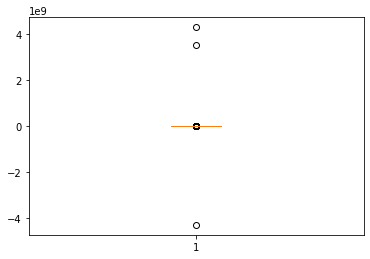

In [158]:
plt.boxplot(df['Deuda']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1d59bf36be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d59bf36eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d59bf367b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d59bf43940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d59bf43c88>],
 'means': []}

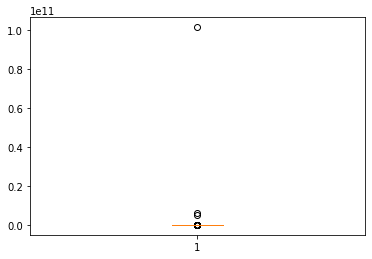

In [159]:
plt.boxplot(df['Cuenta'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d59bf91ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d59bf9e5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d59bf91ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d59bf9ec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d59bf9ef28>],
 'means': []}

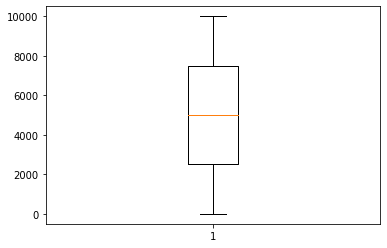

In [160]:
plt.boxplot(df['ID'])

In [161]:
df.describe()

,ID,PudoPagar,Deuda,Cuenta
count,10002.000000,10002.000000,1.000200e+04,1.000200e+04
mean,5000.379324,0.033293,3.036624e+06,1.545269e+07
std,2887.127481,0.179410,7.028235e+07,1.019546e+09
min,-3.000000,0.000000,-4.288864e+09,-2.247063e+07
25%,2500.250000,0.000000,1.823657e+06,2.408188e+06
50%,5000.500000,0.000000,3.209805e+06,4.118185e+06
75%,7500.750000,0.000000,4.281461e+06,5.833152e+06
max,10000.000000,1.000000,4.299358e+09,1.016613e+11


In [162]:
df[df.duplicated('ID')]

,ID,PudoPagar,Estudiante,Deuda,Cuenta
499,500,0,Si,1644010,4827937
500,500,0,Si,2048960,9342700
1423,1424,0,No,3640304,7574816
8143,8142,0,Si,2428223,1136586


Resumen de los problemas encontrados:
- Se encontro que \[VALORES NULOS EN ESTUDIANTE]. Para solucionar este problema se aplico la eliminacion de las filas que contenian los valores nulos, ya que considero que los datos no se podian recuperar 
- Se encontro que \[DATOS ATIPICOS EN DEUDA].Para solucionar este problema se implemento un metodo que elimina todas las filas que contengan datos atipicos segun sus columnas respectivas, ya que considero que esos datos pueden afectar la prediccion de si se puede pagar un credito financiero o no
- Se encontro que \[DATOS ATIPICOS EN CUENTA].Para solucionar este problema se implemento un metodo que elimina todas las filas que contengan datos atipicos segun sus columnas respectivas, ya que considero que esos datos pueden afectar la prediccion de si se puede pagar un credito financiero o no
- Se encontro que \[VALORES NEGATIVOS EN DEUDA]. Para solucionar este problema se decidió que debia de filtrar todos los datos de la columna DEUDA, ya que considero que los valores de la columna DEUDA deben de ser positivos o cero.
- Se encontro que \[VALORES NEGATIVOS EN ID].  Para solucionar este problema se decidió que debia de filtrar todos los datos de la columna DEUDA, ya que considero que los valores de la columna ID deben de ser positivos.
- Se encontro que \[VALORES NEGATIVOS EN CUENTA].  Para solucionar este problema se decidió que debia de filtrar todos los datos de la columna DEUDA, ya que considero que los valores de la columna DEUDA deben de ser positivos o cero.
- Se encontro que \[ESTUDIANTE TIENE 4 VALORES POSIBLES (DEBERIA DE SER BINARIO Si o No)]. Para solucionar este problema se decidió que debia de filtrar los valores de la columna estudiante por solo los que contengan Si o NO, ya que considero que los unicos dos posibles valores de una variable de tipo categorica binaria debe der ser en este caso el Si o el No.
- Se encontro que \[LA COLUMNA PUDOPAGAR DEBE DE SER DE TIPO CATEGORICA BINARIA Y NO DE TIPO INT64]. Para solucionar este problema se decidió que deberia de cambiar el tipo dato que tiene la columna PUDOPAGAR, ya que considero que esa variable al igual que el enunciado afirma ser de tipo categorica binaria y no de tipo INT64.
- Se encontro que \[LA COLUMNA ID TIENE VALORES REPETIDOS]. Para solucionar este problema se decidió que deberia de eliminar las filas de los id repetidos para no tener inconsistencias, ya que considero que seria un problema y una inconsistencia que un cliente con el mismo ID tenga dos resultados diferentes.

## Corrección de problemas de datos.

Eliminacion de los valores Nulos en la columna ESTUDIANTE

In [163]:
df.shape

(10002, 5)

In [164]:
df=df.dropna() 

In [165]:
df.shape

(9998, 5)

Eliminacion de los valores negativos en las columnas DEUDA,ID y CUENTA

In [166]:
df=df[df['Deuda']>=0]
df=df[df['ID']>0]
df=df[df['Cuenta']>=0]

Eliminacion de los valores extras de la columna estudiante

In [167]:
df=df[(df['Estudiante'] == "Si") | (df['Estudiante'] == "No")]

In [168]:
df.describe(include="all")

,ID,PudoPagar,Estudiante,Deuda,Cuenta
count,8990.000000,8990.000000,8990,8.990000e+03,8.990000e+03
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,No,NaN,NaN
freq,NaN,NaN,6329,NaN,NaN
mean,5335.754394,0.032703,NaN,4.222225e+06,1.672789e+07
std,2851.805236,0.177868,NaN,5.865478e+07,1.075399e+09
min,1.000000,0.000000,NaN,7.719700e+04,0.000000e+00
25%,3253.250000,0.000000,NaN,2.127846e+06,2.410914e+06
50%,5501.500000,0.000000,NaN,3.455940e+06,4.122666e+06
75%,7750.750000,0.000000,NaN,4.386031e+06,5.835423e+06


Correccion del tipo de dato de la columna PUDOPAGAR

In [169]:
df["PudoPagar"]=df.PudoPagar.astype(object)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8990 entries, 0 to 10001
Data columns (total 5 columns):
ID            8990 non-null int64
PudoPagar     8990 non-null object
Estudiante    8990 non-null object
Deuda         8990 non-null int64
Cuenta        8990 non-null int64
dtypes: int64(3), object(2)
memory usage: 421.4+ KB


Eliminacion de los datos atipicos de las columnas DEUDA y CUENTA

In [171]:
def drop_numerical_outliers(df, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
drop_numerical_outliers(df)
df

,ID,PudoPagar,Estudiante,Deuda,Cuenta
90,91,0,No,4449516,6663913
91,92,0,No,3504311,7021915
92,93,0,Si,1657819,5744826
93,94,0,No,5759683,1841117
94,95,0,No,4595067,2247333
95,96,0,No,5158466,4100086
96,97,0,Si,1575062,3098759
97,98,0,No,4641697,5238591
98,99,0,No,4719389,1219207
99,100,0,No,4543055,932502


In [172]:
df.describe(include="all")

,ID,PudoPagar,Estudiante,Deuda,Cuenta
count,8548.000000,8548.0,8548,8.548000e+03,8.548000e+03
unique,NaN,2.0,2,NaN,NaN
top,NaN,0.0,No,NaN,NaN
freq,NaN,8326.0,6072,NaN,NaN
mean,5339.711394,NaN,NaN,3.348964e+06,4.112817e+06
std,2793.964715,NaN,NaN,1.283404e+06,2.342015e+06
min,91.000000,NaN,NaN,9.778220e+05,0.000000e+00
25%,3291.750000,NaN,NaN,2.152189e+06,2.381070e+06
50%,5503.500000,NaN,NaN,3.460156e+06,4.086704e+06
75%,7699.250000,NaN,NaN,4.367654e+06,5.778527e+06


{'whiskers': [<matplotlib.lines.Line2D at 0x1d59c0007b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d59c000eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d59c000390>],
 'medians': [<matplotlib.lines.Line2D at 0x1d59c00a588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d59c00a8d0>],
 'means': []}

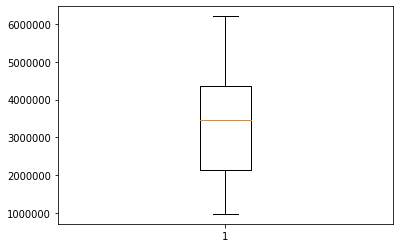

In [173]:
plt.boxplot(df['Deuda']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1d59c05b470>,
 'caps': [<matplotlib.lines.Line2D at 0x1d59c05bb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d59c05b048>],
 'medians': [<matplotlib.lines.Line2D at 0x1d59c05bf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d59c063550>],
 'means': []}

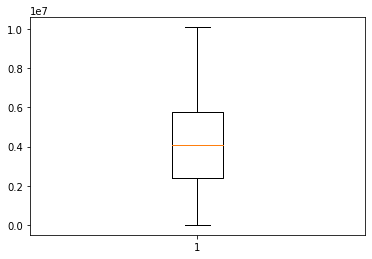

In [174]:
plt.boxplot(df['Cuenta']) 

Elimino los ID repetidos

In [175]:
df=df.drop_duplicates('ID')

Tenemos que el dataset después de limpieza cuenta con  8544 registros.

# 2. Modelo de referencia (Baseline)

In [176]:
total_filas= df.shape[0]
print(total_filas)
total_filas_vinculado=df[df['PudoPagar'] == 0].shape[0]
print(total_filas_vinculado)
result= total_filas_vinculado/total_filas
result=result*100
print("El baseline de los estudiantes que tuvieron problemas para poder pagar es de "+str(result)+"%")
print("El proximo estudiante que vaya a entrar probablemente vaya a tener problemas para poder pagar")

8544
8322
El baseline de los estudiantes que tuvieron problemas para poder pagar es de 97.40168539325843%
El proximo estudiante que vaya a entrar probablemente vaya a tener problemas para poder pagar


# 3. Holdout sobre el dataset

In [177]:
df1=df[df["Estudiante"] == 'Si']
df2=df[df["Estudiante"] == 'No']

In [178]:
from sklearn import preprocessing
lista= df[["Cuenta","Deuda"]].values
lista1= df1[["Cuenta","Deuda"]].values
lista2= df2[["Cuenta","Deuda"]].values
X_normalized = preprocessing.normalize(lista, norm='l2')
X_normalized1 = preprocessing.normalize(lista1, norm='l2')
X_normalized2 = preprocessing.normalize(lista2, norm='l2')
y=df[["PudoPagar"]]
y1=df1[["PudoPagar"]]
y2=df2[["PudoPagar"]]
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normalized1, y1, test_size=0.3,random_state=12345)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalized2, y2, test_size=0.3,random_state=12345)

In [179]:
kf=KFold(n_splits=5, random_state=None, shuffle=True)
kf1=KFold(n_splits=5, random_state=None, shuffle=True)
kf2=KFold(n_splits=5, random_state=None, shuffle=True)


# 4. KNN

In [180]:
from sklearn.metrics import cohen_kappa_score, make_scorer


kappa_scorer = make_scorer(cohen_kappa_score)
acc_train_vec=[]

ks=[1,3,5,7,9,11,15,17,22,25]
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=12345)
acc_test_vec=[]   
print("Global")
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    exactitudesknn = cross_val_score(knn, X_train, y_train.astype('int'), cv=5, scoring=kappa_scorer)
    acc_train_vec.append(met)
    acc_test_vec.append([exactitudesknn.mean()])
    
    print("Con K = ", k, ", kappa: ",exactitudesknn.mean())

max(acc_test_vec)

Global
Con K =  1 , kappa:  0.02675145189434567
Con K =  3 , kappa:  -0.007388544452264778
Con K =  5 , kappa:  -0.0033737704521245248
Con K =  7 , kappa:  -0.001244358626171893
Con K =  9 , kappa:  0.0
Con K =  11 , kappa:  0.0
Con K =  15 , kappa:  0.0
Con K =  17 , kappa:  0.0
Con K =  22 , kappa:  0.0
Con K =  25 , kappa:  0.0


[0.02675145189434567, 1, 0.03174064637100776]

In [181]:
ks=[1,3,5,7,9,11,15,17,22,25]
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=12345)  
kappa_scorer = make_scorer(cohen_kappa_score)
acc_test_vec1=[]   
print("Estudiante")
for k in ks:
    knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
    exactitudesknn1 = cross_val_score(knn1, X_train1, y_train1.astype('int'), cv=5, scoring=kappa_scorer)
    acc_test_vec1.append([exactitudesknn1.mean(),k,exactitudesknn1.std()])
    print("Con K = ", k, ", kappa: ",exactitudesknn1.mean())
max(acc_test_vec1)

Estudiante
Con K =  1 , kappa:  0.0180356582499658
Con K =  3 , kappa:  -0.007641552475714431
Con K =  5 , kappa:  -0.004839748493956408
Con K =  7 , kappa:  0.0
Con K =  9 , kappa:  0.0
Con K =  11 , kappa:  0.0
Con K =  15 , kappa:  0.0
Con K =  17 , kappa:  0.0
Con K =  22 , kappa:  0.0
Con K =  25 , kappa:  0.0


[0.0180356582499658, 1, 0.0495466722037113]

In [182]:
ks=[1,3,5,7,9,11,15,17,22,25]
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=12345)  
kappa_scorer = make_scorer(cohen_kappa_score)
acc_test_vec2=[]   
print("No Estudiante")
for k in ks:
    knn2 = neighbors.KNeighborsClassifier(n_neighbors=k)
    exactitudesknn2 = cross_val_score(knn2, X_train2, y_train2.astype('int'), cv=5, scoring=kappa_scorer)
    acc_test_vec2.append([exactitudesknn2.mean(),k,exactitudesknn2.std()])
    print("Con K = ", k, ", kappa: ",exactitudesknn2.mean())
max(acc_test_vec2)

No Estudiante
Con K =  1 , kappa:  0.09912434148477459
Con K =  3 , kappa:  -0.008762482235042234
Con K =  5 , kappa:  -0.0036878472135946083
Con K =  7 , kappa:  -0.0004491858506456836
Con K =  9 , kappa:  0.0
Con K =  11 , kappa:  -0.0004497161167013264
Con K =  15 , kappa:  0.0
Con K =  17 , kappa:  0.0
Con K =  22 , kappa:  0.0
Con K =  25 , kappa:  0.0


[0.09912434148477459, 1, 0.07160210858401056]

Podemos concluir que los datos globales tienen una kappa de 0.02675145189434567 cuando k=1, los Estudiantes tienen un kappa de 0.0180356582499658 cuando k=1, los no estudiantes tienen un kappa de 0.09912434148477459 cuando k=1.
En conclusion el mejor modelo en este caso es el kappa de los no estudiantes (0.099) cuando k=1.

Realizo un mapeo sobre los datos de estudiante donde el Si=1 y el No=0 donde toda la columna va a ser de tipo int64.

# 5. Naive Bayes

In [183]:

from sklearn.metrics import cohen_kappa_score, make_scorer
model = naive_bayes.GaussianNB()

kappa_scorer = make_scorer(cohen_kappa_score)


#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=12345)

print("Global")
exactitudes = cross_val_score(naive_bayes.GaussianNB(), X_train, y_train.astype('int'), cv=5, scoring=kappa_scorer)
print("kappa: ",exactitudes)


Global
kappa:  [0. 0. 0. 0. 0.]


In [184]:
from sklearn.metrics import cohen_kappa_score, make_scorer
model = naive_bayes.GaussianNB()

kappa_scorer = make_scorer(cohen_kappa_score)


#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=12345)

print("Estudiante")
exactitudes1 = cross_val_score(naive_bayes.GaussianNB(), X_train1, y_train1.astype('int'), cv=5, scoring=kappa_scorer)
print("kappa: ",exactitudes1)


Estudiante
kappa:  [0.04446102 0.07318945 0.08030521 0.12358496 0.10022355]


In [185]:
from sklearn.metrics import cohen_kappa_score, make_scorer
model = naive_bayes.GaussianNB()

kappa_scorer = make_scorer(cohen_kappa_score)


#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=12345)

print("No estudiante")
exactitudes2 = cross_val_score(naive_bayes.GaussianNB(), X_train2, y_train2.astype('int'), cv=5, scoring=kappa_scorer)
print("kappa: ",exactitudes2)


No estudiante
kappa:  [0.         0.08316775 0.1494571  0.08729306 0.09797748]


# 6. Comparación y conclusiones

In [186]:
print("Global")
print("KNN. Exactitudes: %0.2f (+/- %0.2f)" % (max(acc_test_vec)[0], max(acc_test_vec)[2] * 2))
print("GNB. Exactitudes: %0.2f (+/- %0.2f)" % (exactitudes.mean(), exactitudes.std() * 2))

Global
KNN. Exactitudes: 0.03 (+/- 0.06)
GNB. Exactitudes: 0.00 (+/- 0.00)


In [189]:
print("Estudiante")
print("KNN. Exactitudes: %0.2f (+/- %0.2f)" % (max(acc_test_vec1)[0], max(acc_test_vec1)[2] * 2))
print("GNB. Exactitudes: %0.2f (+/- %0.2f)" % (exactitudes1.mean(), exactitudes1.std() * 2))

Estudiante
KNN. Exactitudes: 0.02 (+/- 0.10)
GNB. Exactitudes: 0.08 (+/- 0.05)


In [190]:
print("No Estudiante")
print("KNN. Exactitudes: %0.2f (+/- %0.2f)" % (max(acc_test_vec2)[0], max(acc_test_vec2)[2] * 2))
print("GNB. Exactitudes: %0.2f (+/- %0.2f)" % (exactitudes2.mean(), exactitudes2.std() * 2))

No Estudiante
KNN. Exactitudes: 0.10 (+/- 0.14)
GNB. Exactitudes: 0.08 (+/- 0.10)


En este caso yo escogeria el No Estudiante de Knn porque tiene un kappa de 0.10 con un error de +/- 0.14 el cual tiene el mayor kappa entre todos los modelos aqui presentes.